# PCA

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

Make the PCA of the factors in Multi-asset PCA CHANGES=4w.csv

In [42]:

# Load the data
MA_pca_changes = pd.read_csv('Copie de Multi-asset PCA_CHANGES=4w.csv',index_col=0)
MA_pca_changes_normalised = (MA_pca_changes - MA_pca_changes.mean()) / MA_pca_changes.std()

# Perform PCA
pca_model = PCA()
pca = pca_model.fit_transform(MA_pca_changes_normalised)

In [37]:
format_colour = lambda x: 'color:red' if x < 0. else 'color:lightgreen'

Make the PCA of the factors in Multi-asset PCA CHANGES=4w.csv

In [43]:
# Display the loadings of the first 6 components
loadings = pd.DataFrame(pca_model.components_, columns=MA_pca_changes_normalised.columns)
loadings.T.style.format(formatter='{:+.4f}').applymap(func=format_colour)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
MSCI World,-0.2462,+0.0481,+0.0699,-0.0231,+0.0791,+0.1157,+0.1404,-0.0494,-0.0850,+0.0081,-0.0350,+0.0060,-0.1154,+0.0513,-0.1786,-0.1197,+0.1338,-0.1336,-0.0095,+0.0031,-0.0198,-0.1874,-0.1371,+0.0134,-0.0754,-0.1517,+0.0412,-0.1099,-0.0401,+0.0742,-0.0521,-0.0991,+0.1406,-0.0098,+0.0225,-0.0209,-0.0594,-0.1340,-0.4915,+0.6187
S&P 500,-0.2380,+0.0504,+0.0084,-0.0260,+0.0658,+0.1531,+0.1926,-0.0559,-0.0832,+0.0482,-0.0419,+0.0031,-0.0938,+0.0868,-0.2014,-0.1448,+0.1728,-0.2238,-0.0218,+0.0532,-0.1000,-0.2790,-0.1488,+0.0176,-0.1028,-0.1932,+0.0614,-0.0208,-0.0083,+0.0761,-0.1377,-0.2737,+0.3225,-0.0660,-0.0046,+0.1361,+0.0873,+0.1168,+0.3415,-0.4159
Euro Stoxx 50,-0.2313,+0.0080,-0.0185,-0.0263,+0.2232,+0.0576,+0.0357,-0.0800,-0.1254,+0.0240,-0.0317,-0.0284,-0.3380,+0.0856,-0.1572,-0.0380,+0.0249,+0.2123,+0.1986,-0.0639,+0.0961,-0.0122,-0.1060,+0.1186,-0.0270,-0.1087,-0.0404,-0.2740,-0.2352,+0.0619,-0.0296,+0.5226,-0.3013,+0.0735,+0.0276,-0.1687,-0.0959,-0.0328,+0.1444,-0.1262
Euro Stoxx Banks,-0.2028,-0.0478,+0.0300,+0.0307,+0.2606,-0.0605,-0.1995,-0.0922,-0.1934,-0.0151,-0.0008,-0.0133,-0.3673,+0.0666,-0.1938,+0.0356,+0.1051,+0.4407,+0.0136,-0.1735,+0.0584,+0.1487,+0.2751,-0.1190,+0.1809,+0.1158,+0.0267,+0.2241,+0.1986,-0.1246,+0.0222,-0.2892,+0.1236,-0.0500,-0.0187,+0.0704,+0.0736,+0.0466,-0.0330,+0.0082
CDX.IG 5Y,-0.2268,+0.0132,-0.0614,+0.0019,+0.2061,+0.0422,+0.1215,+0.1169,+0.1716,+0.1234,-0.0960,-0.0617,+0.1186,-0.0483,+0.1454,+0.2411,+0.2164,-0.0135,-0.1130,+0.2099,+0.0475,-0.1992,+0.2860,+0.1914,+0.1133,-0.1177,+0.0099,-0.1415,+0.2752,-0.1499,+0.1965,+0.0887,-0.1543,-0.4658,-0.1440,-0.0291,-0.0050,+0.0206,-0.0025,+0.0027
CDX.HY 5Y,-0.2362,+0.0350,-0.0365,-0.0534,+0.1419,+0.1175,+0.0355,+0.1464,-0.0048,-0.0312,-0.0414,+0.0235,-0.0054,+0.0293,+0.2083,-0.0418,+0.1201,-0.2908,+0.1200,-0.1123,-0.1712,+0.2440,-0.0589,-0.2431,+0.0658,-0.2484,+0.2042,+0.3573,+0.3231,+0.0838,+0.0322,+0.1470,-0.2466,+0.3050,-0.1575,+0.0525,+0.0170,-0.0639,+0.0094,-0.0133
iTraxx Europe 5Y,-0.2182,-0.0144,-0.0844,-0.0610,+0.2710,-0.1312,+0.0212,+0.1153,+0.1834,+0.0619,-0.0675,-0.0307,+0.0300,+0.0192,+0.2522,+0.1853,+0.0647,+0.0012,+0.0752,+0.2282,+0.2234,-0.0578,+0.1304,+0.2746,-0.0826,+0.1605,-0.0757,-0.0107,-0.1113,+0.0464,-0.0997,-0.1886,+0.1137,+0.5773,+0.1964,+0.0134,+0.0351,-0.0416,-0.0214,-0.0168
iTraxx Crossover 5Y,-0.2279,-0.0034,-0.0723,-0.1239,+0.1645,-0.0209,-0.0067,+0.1312,+0.0568,-0.0655,-0.0429,+0.0617,-0.0617,+0.0092,+0.3163,+0.0367,-0.0885,-0.1706,+0.2268,-0.0425,+0.2144,+0.3701,-0.2377,-0.1653,+0.0119,+0.1425,-0.0910,+0.0218,-0.3174,-0.0050,-0.0669,-0.0362,+0.2317,-0.4593,-0.0350,-0.0041,+0.0329,+0.0616,-0.0280,+0.0060
Italy - Germany 10Y,+0.0866,+0.0277,-0.0483,+0.0418,-0.3536,+0.5283,+0.1537,+0.3964,-0.1243,-0.1593,-0.0793,-0.0318,-0.1467,+0.0765,+0.0406,+0.0229,+0.2363,+0.2043,-0.0396,+0.1611,+0.3457,+0.0147,+0.0060,-0.0587,-0.0959,+0.0257,-0.0078,+0.1404,-0.0926,-0.1243,+0.0891,-0.0108,-0.0409,+0.0485,+0.0329,+0.0816,-0.0109,-0.0139,+0.0432,+0.0322
US 2Y,-0.1027,-0.2476,-0.1634,+0.1108,-0.0440,+0.1254,-0.0283,+0.0520,+0.1978,-0.0387,+0.0433,-0.0963,-0.1059,-0.4250,-0.0369,-0.3334,-0.0534,-0.0513,-0.0743,+0.0307,+0.0078,+0.0148,+0.2616,+0.0787,+0.2994,-0.0185,+0.2665,+0.0543,-0.2259,+0.3360,+0.0601,+0.0619,+0.0146,-0.0319,+0.1671,+0.0923,-0.0023,+0.2197,-0.0613,+0.0010


Display the fraction of the variance explained by each PCA (sorted by the explained variance)
and the cumsum

In [44]:
explained_variance = pca_model.explained_variance_ratio_
print("Explained variance by each PCA:\n", explained_variance)

Explained variance by each PCA:
 [3.49501109e-01 1.96122521e-01 7.86152054e-02 6.73511749e-02
 4.43169362e-02 3.20005210e-02 2.57346311e-02 2.35850404e-02
 1.91035916e-02 1.75077524e-02 1.63124328e-02 1.43136043e-02
 1.30765640e-02 1.28271959e-02 1.14520977e-02 1.06077293e-02
 9.00256480e-03 7.81254429e-03 7.54358004e-03 6.57798052e-03
 6.31120925e-03 4.57440808e-03 3.91695351e-03 3.21596951e-03
 2.90392285e-03 2.64747045e-03 2.28898300e-03 2.09169976e-03
 1.62305334e-03 1.43251415e-03 1.28479662e-03 9.74741109e-04
 9.36963577e-04 6.06778001e-04 5.77747898e-04 4.10306847e-04
 3.41867587e-04 2.08664913e-04 1.77448809e-04 1.09724080e-04]


In [45]:
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_explained_variance)

Cumulative explained variance:
 [0.34950111 0.54562363 0.62423884 0.69159001 0.73590695 0.76790747
 0.7936421  0.81722714 0.83633073 0.85383848 0.87015092 0.88446452
 0.89754108 0.91036828 0.92182038 0.93242811 0.94143067 0.94924322
 0.9567868  0.96336478 0.96967599 0.97425039 0.97816735 0.98138332
 0.98428724 0.98693471 0.98922369 0.99131539 0.99293845 0.99437096
 0.99565576 0.9966305  0.99756746 0.99817424 0.99875199 0.99916229
 0.99950416 0.99971283 0.99989028 1.        ]


How many components are needed to explain 75% of the variance? 80%?

In [46]:
components_75 = np.where(cumulative_explained_variance >= 0.75)[0][0] + 1
components_80 = np.where(cumulative_explained_variance >= 0.80)[0][0] + 1
print(f"{components_75} components are needed to explain 75% of the variance.")
print(f"{components_80} components are needed to explain 80% of the variance.")

6 components are needed to explain 75% of the variance.
8 components are needed to explain 80% of the variance.


Display the cumsum of the returns of the 3 main components

In [51]:
returns = pd.DataFrame(pca_model.transform(MA_pca_changes_normalised), columns=[f'PC{i+1}' for i in range(pca_model.n_components_)])
print("Cumulative returns of the 3 main components:\n", returns.iloc[:, :3].cumsum())

Cumulative returns of the 3 main components:
               PC1           PC2           PC3
0   -1.131291e+00  1.568731e+00 -2.907101e+00
1   -1.403827e+00  5.595963e-01 -3.419135e+00
2   -3.661723e+00 -7.017453e-01 -2.199867e+00
3   -2.515865e+00  1.695328e+00 -2.465353e+00
4   -3.144404e+00 -4.732644e-01 -3.541697e+00
..            ...           ...           ...
227  9.513089e-01 -1.909830e-01 -3.130401e+00
228  1.275235e+00 -4.889290e+00 -6.175842e-01
229 -2.620088e+00  2.275565e+00 -1.812545e-01
230 -2.463381e+00 -4.476623e+00 -1.842578e+00
231 -1.287859e-14 -2.131628e-14  1.265654e-14

[232 rows x 3 columns]


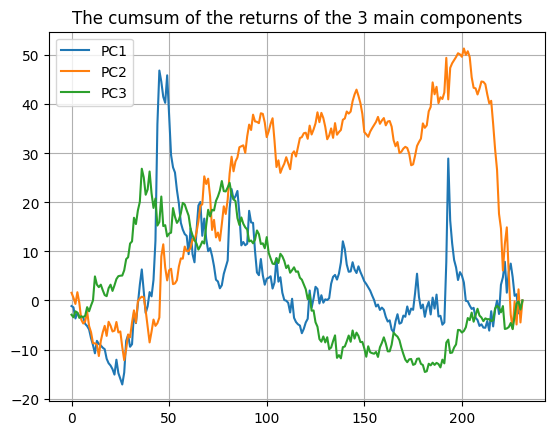

In [52]:
plt.plot(returns.iloc[:, :3].cumsum())
leg = ['PC1','PC2','PC3']
plt.grid(True)
plt.legend(leg,loc='best')
plt.title('The cumsum of the returns of the 3 main components')
plt.show()

Regress each factors to each of the first 6 components and display the DataFrame:<br>
– Index: the factors<br>
– Columns: the 6 main components<br>
– Content: the r2of the regression of the factors vs the components<br>


In [53]:
r2_df = pd.DataFrame(index=MA_pca_changes_normalised.columns, columns=[f'PC{i+1}' for i in range(pca_model.n_components_)])
for factor in MA_pca_changes_normalised.columns:
    for pc in r2_df.columns:
        model = LinearRegression().fit(returns[[pc]], MA_pca_changes_normalised[factor])
        predictions = model.predict(returns[[pc]])
        r2_df.loc[factor, pc] = r2_score(MA_pca_changes_normalised[factor], predictions)

r2_df = r2_df.apply(pd.to_numeric, errors='coerce')

r2_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
MSCI World,0.847734,0.018132,0.015373,0.001434,0.011094,0.017129,0.020302,0.002302,0.005526,0.000046,...,1.394304e-04,0.000383,7.412961e-04,2.315037e-06,1.166508e-05,7.177734e-06,4.824729e-05,1.499622e-04,1.714606e-03,1.679936e-03
S&P 500,0.791634,0.019967,0.000220,0.001818,0.007687,0.030013,0.038203,0.002953,0.005294,0.001627,...,9.739845e-04,0.002920,3.898036e-03,1.056651e-04,4.946021e-07,3.042047e-04,1.041146e-04,1.138904e-04,8.276297e-04,7.592666e-04
Euro Stoxx 50,0.747764,0.000497,0.001075,0.001861,0.088351,0.004250,0.001310,0.006042,0.012026,0.000402,...,4.513669e-05,0.010648,3.401533e-03,1.312014e-04,1.760149e-05,4.668580e-04,1.257337e-04,8.985179e-06,1.480830e-04,6.991832e-05
Euro Stoxx Banks,0.574965,0.017899,0.002831,0.002532,0.120362,0.004685,0.040990,0.008019,0.028593,0.000160,...,2.532844e-05,0.003260,5.726346e-04,6.056276e-05,8.075925e-06,8.139154e-05,7.407117e-05,1.815264e-05,7.749820e-06,2.940043e-07
CDX.IG 5Y,0.719317,0.001376,0.011846,0.000010,0.075298,0.002283,0.015204,0.012887,0.022499,0.010672,...,1.984130e-03,0.000307,8.923371e-04,5.266626e-03,4.791749e-04,1.389138e-05,3.406397e-07,3.546004e-06,4.276767e-08,3.142745e-08
CDX.HY 5Y,0.779932,0.009609,0.004181,0.007669,0.035685,0.017670,0.001295,0.020226,0.000017,0.000680,...,5.322577e-05,0.000842,2.278346e-03,2.257205e-03,5.731757e-04,4.527142e-05,3.935893e-06,3.402826e-05,6.281247e-07,7.726994e-07
iTraxx Europe 5Y,0.665570,0.001616,0.022407,0.010025,0.130195,0.022045,0.000462,0.012546,0.025701,0.002686,...,5.107135e-04,0.001387,4.848371e-04,8.090210e-03,8.913355e-04,2.933857e-06,1.689305e-05,1.442518e-05,3.252383e-06,1.235945e-06
iTraxx Crossover 5Y,0.726087,0.000088,0.016429,0.041374,0.047959,0.000557,0.000046,0.016236,0.002467,0.003005,...,2.302162e-04,0.000051,2.011978e-03,5.119459e-03,2.828740e-05,2.826573e-07,1.481080e-05,3.170652e-05,5.580187e-06,1.577823e-07
Italy - Germany 10Y,0.104820,0.006027,0.007327,0.004699,0.221695,0.357315,0.024310,0.148270,0.011815,0.017771,...,4.081448e-04,0.000005,6.277003e-05,5.704296e-05,2.503307e-05,1.093889e-04,1.636511e-06,1.604535e-06,1.326736e-05,4.543910e-06
US 2Y,0.147492,0.480846,0.083955,0.033085,0.003437,0.020123,0.000822,0.002547,0.029883,0.001047,...,1.857329e-04,0.000149,8.008987e-06,2.472703e-05,6.453954e-04,1.397188e-04,7.303063e-08,4.028535e-04,2.666402e-05,4.523572e-09


In [54]:
best_factor = []
for i in range(3):
    pc = f'PC{i+1}'
    best_factor.append(r2_df[pc].idxmax())
    print(f"The factor best explained by {pc} is {best_factor[i]}.")

The factor best explained by PC1 is MSCI World.
The factor best explained by PC2 is US 10Y.
The factor best explained by PC3 is EUR/USD.


– What is the factor the best explained by PC1? Display the cumsum of that factor and
of PC1

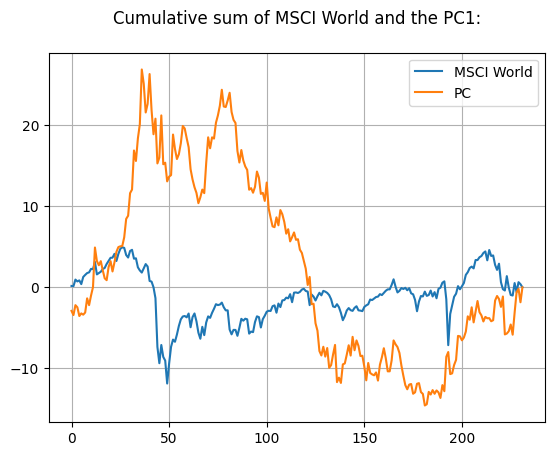

In [55]:
df_pc1=pd.DataFrame({f'{best_factor[0]}': MA_pca_changes_normalised[best_factor[0]].cumsum().reset_index(drop=True), 'PC': returns[pc].cumsum()})
df_pc1.plot()
plt.title(f"Cumulative sum of {best_factor[0]} and the PC1:\n")
plt.grid(True)

What is the factor the best explained by PC2? Display the cumsum of that factor and
of PC2

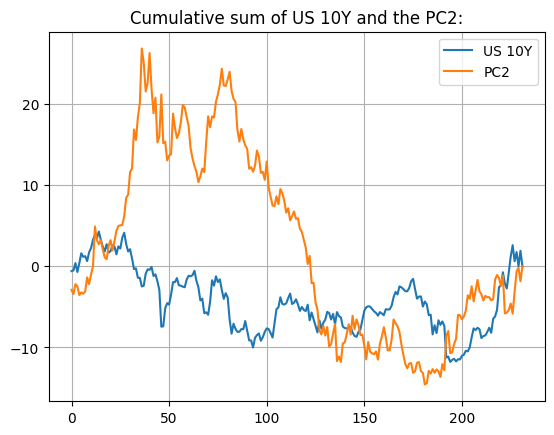

In [56]:
df_pc2=pd.DataFrame({f'{best_factor[1]}': MA_pca_changes_normalised[best_factor[1]].cumsum().reset_index(drop=True), 'PC2': returns[pc].cumsum()})
df_pc2.plot()
plt.title(f"Cumulative sum of {best_factor[1]} and the PC2:")
plt.grid(True)

What is the factor the best explained by PC3? Display the cumsum of that factor and
of PC3

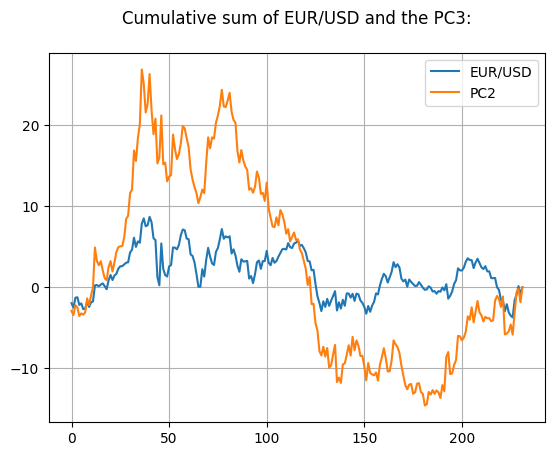

In [60]:
df_pc3=pd.DataFrame({f'{best_factor[2]}': MA_pca_changes_normalised[best_factor[2]].cumsum().reset_index(drop=True), 'PC2': returns[pc].cumsum()})
df_pc3.plot()
plt.title(f"Cumulative sum of {best_factor[2]} and the PC3:\n")
plt.grid(True)

# Study of the Traditional Assets

load the Traditional Assets Multi-asset PCA CHANGES=4w.csv file

In [714]:
# Load the data
TAM_4w = pd.read_csv('Copie de Traditional Assets_Multi-asset PCA_CHANGES=4w.csv',index_col=0)

# Perform PCA
pca_TAM = PCA(n_components=2)
pca_TAM.fit(TAM_4w)

PCA(n_components=2)

Compute the correlation of each assets with PC1 and PC2

In [715]:
# Compute the correlation of each asset with PC1 and PC2
returns = pd.DataFrame(pca_TAM.transform(TAM_4w), columns=[f'PC{i+1}' for i in range(pca_TAM.n_components_)])
TAM_4w = TAM_4w.reset_index(drop=True)
returns = returns.reset_index(drop=True)
concat = pd.concat([TAM_4w,returns],axis=1)
focus_cols = ['PC1', 'PC2']
correlation_TAM_4w= concat.corr().filter(focus_cols).drop(focus_cols)

Display the DataFrame:<br>
– Index: Traditional Asset <br>
– Column: PC1 and PC2<br>
– Contains: the correlation between Traditional Asset and the PCs<br>

In [716]:
print("Correlation between Traditional Asset and the PCs:\n")
correlation_TAM_4w.style.format(formatter='{:+.4f}').applymap(func=format_colour)

Correlation between Traditional Asset and the PCs:



,PC1,PC2
US Govt. Bonds,+0.2900,+0.1804
European Govt. Bonds,+0.0990,+0.2463
US IG Corp. Bonds,-0.2971,+0.5312
European IG Corp. Bonds,-0.3010,+0.4202
US High Yield,-0.6476,+0.5076
European High Yield,-0.6056,+0.4770
MSCI World,-0.6843,+0.6047
S&P 500,-0.6221,+0.6200
Crude Oil,-0.9139,-0.4017
Industrial Metals,-0.7066,+0.3830


Make a scatter plot of the previous DataFrame displaying also the name of the points

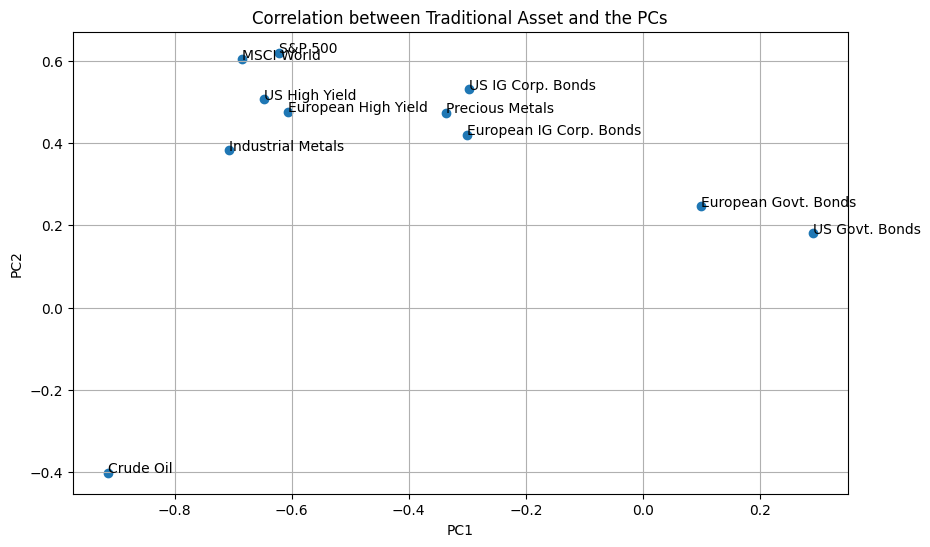

In [717]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_TAM_4w['PC1'], correlation_TAM_4w['PC2'])

for i, txt in enumerate(correlation_TAM_4w.index):
    plt.annotate(txt, (correlation_TAM_4w['PC1'].iloc[i], correlation_TAM_4w['PC2'].iloc[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation between Traditional Asset and the PCs')
plt.grid(True)
plt.show()

# Systematic Strategies

Do the same with the file Systematic Strategies Multi-asset PCA CHANGES=4w.csv

In [76]:
# Load the data
SSAM_4w = pd.read_csv('Copie de Systematic Strategies_Multi-asset PCA_CHANGES=4w.csv',index_col=0)
SSAM_4w.fillna(0, inplace=True)
# Perform PCA
SSAM_4w_normalized = (SSAM_4w - SSAM_4w.mean()) / SSAM_4w.std()
pca_SSAM_model = PCA(n_components=2)
pca_SSAM = pca_SSAM_model.fit_transform(SSAM_4w_normalized)


Compute the correlation of each assets with PC1 and PC2

In [75]:
# Compute the correlation of each asset with PC1 and PC2
returns = pd.DataFrame(pca_SSAM.transform(SSAM_4w), columns=[f'PC{i+1}' for i in range(pca_SSAM.n_components_)])
SSAM_4w_normalized = SSAM_4w_normalized.reset_index(drop=True)
returns = returns.reset_index(drop=True)
concat = pd.concat([SSAM_4w,returns],axis=1)
focus_cols = ['PC1', 'PC2']

correlation_SSAM_4w= concat.corr().filter(focus_cols).drop(focus_cols)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

Display the DataFrame:<br>
– Index: Traditional Asset <br>
– Column: PC1 and PC2<br>
– Contains: the correlation between Traditional Asset and the PCs<br>

In [71]:
print("Correlation between Systematic Strategies Multi Asset and the PCs:\n")
correlation_SSAM_4w.style.format(formatter='{:+.4f}').applymap(func=format_colour)

Correlation between Systematic Strategies Multi Asset and the PCs:



,PC1,PC2
Global Quality Income vs. Index,+nan,+nan
Global Equity Machine Learning,+nan,+nan
European Value vs. Index,+nan,+nan
Commodity Congestion,+nan,+nan
Multi-asset Trend,+nan,+nan
Repo Carry,+nan,+nan
Long Rates Vol.,+nan,+nan
Tail Hedge -SDV,+nan,+nan
Tail Hedge - SCV,+nan,+nan
Tail Hedge - Dynamic Put Ratio,+nan,+nan


Make a scatter plot of the previous DataFrame displaying also the name of the points

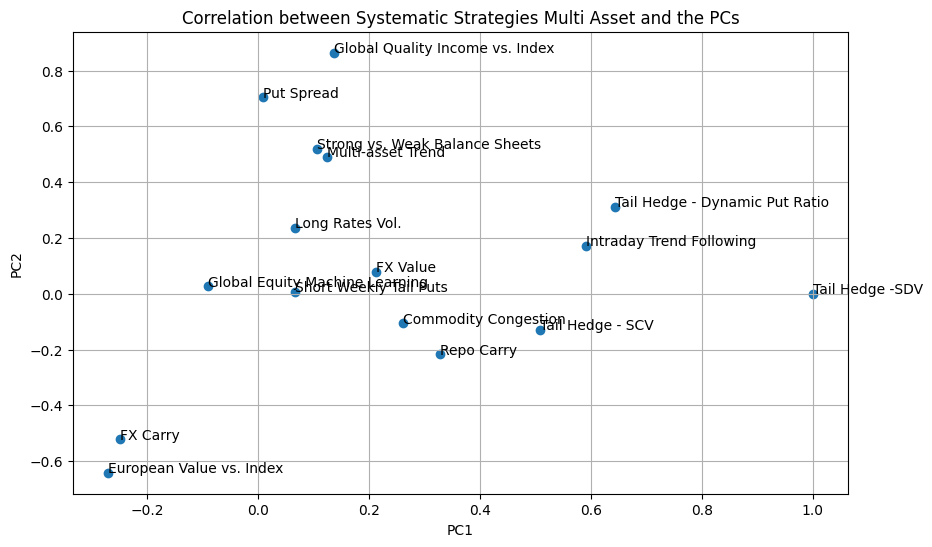

In [721]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_SSAM_4w['PC1'], correlation_SSAM_4w['PC2'])

for i, txt in enumerate(correlation_SSAM_4w.index):
    plt.annotate(txt, (correlation_SSAM_4w['PC1'].iloc[i], correlation_SSAM_4w['PC2'].iloc[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation between Systematic Strategies Multi Asset and the PCs')
plt.grid(True)
plt.show()

# Portfolio Optimization<br>
•load equity factor performance data.csv<br>
•it displays the value of funds based on traditional trading factors<br>
•compute the returns of the fund<br>
•construct the min variance portfolio, display its cumsum return<br>
•At the begining of each month construct a portfolio using<br>
– expected return : past month performance<br>
– long only<br>
– total allocation 1<br>
– cannot trade more than 0.05 per factor<br>
– each factor cannot be allocated more than 0.25<br>
– total trading cannot be more than 0.15<br>
•Display the PnL<br>
•Do the same monthly optimization but this time you can get short and the GMV must be 1<br>

In [739]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import cvxpy as cp

In [740]:
df_ef = pd.read_csv('Copie de equity_factor_performance_data.csv', index_col=0, parse_dates=True)

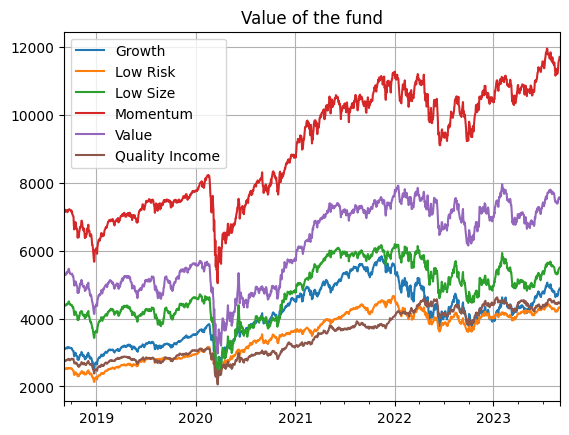

In [741]:
df_ef.plot()
plt.title('Value of the fund')
plt.grid(True)

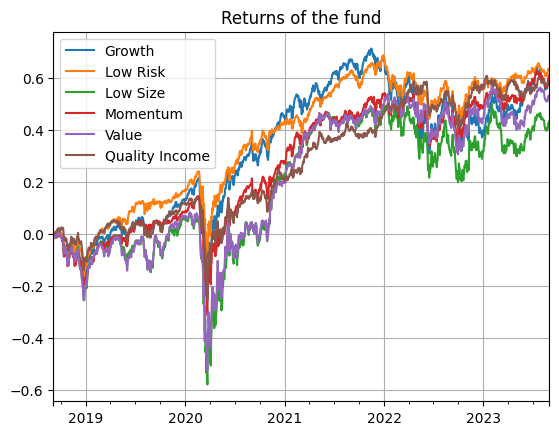

In [742]:
df_ef_returns = df_ef.pct_change()
df_ef_returns.cumsum().plot()
plt.title('Returns of the fund')
plt.grid(True)

In [743]:
def min_variance(expected_return,df_ef):
  n = len(df_ef.columns)
  R = (df_ef.iloc[-1] - df_ef.iloc[0]) / df_ef.iloc[0]
  COV = df_ef.pct_change().cov()
  G = np.vstack([-np.identity(n),-R.values.reshape(1,n)])
  h = np.vstack([np.zeros((n,1)),-np.ones((1,1))*expected_return])
  A = np.ones((1,n))
  b = np.ones(1)
  x = cp.Variable(n)
  prob = cp.Problem(cp.Minimize(cp.quad_form(x, COV)),
                  [G @ x <= h.flatten(),
                    A @ x == b])
  prob.solve()
  X= pd.Series(x.value,R.index)
  C = pd.Series(np.diag(COV),R.index)
  Y = pd.concat([R,C.apply(np.sqrt)*10000,X],axis=1)
  Y.columns = ['Return', 'Volatility', 'Weight']
  return Y

In [744]:
df_min_variance = min_variance(0,df_ef)
df_min_variance.style.format(formatter='{:+.4f}').applymap(func=format_colour)

,Return,Volatility,Weight
Growth,+0.5519,+159.8837,+0.0000
Low Risk,+0.7125,+120.7954,+0.4424
Low Size,+0.2369,+184.0437,-0.0000
Momentum,+0.6195,+138.7744,+0.0000
Value,+0.4105,+170.0034,-0.0000
Quality Income,+0.6197,+118.3051,+0.5576


<AxesSubplot:>

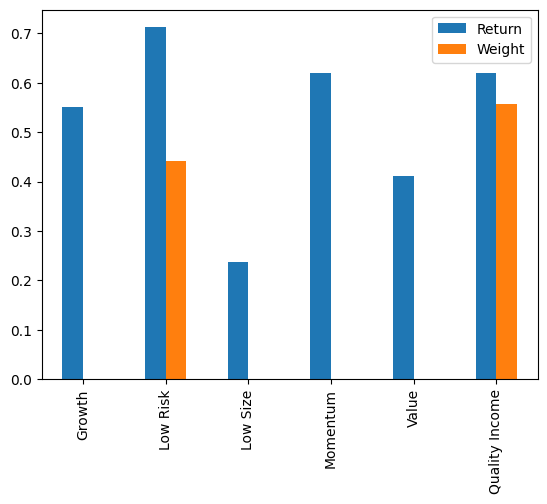

In [745]:
df_min_variance[['Return','Weight']].plot(kind='bar')

In [746]:
df_min_variance.corr().style.format(formatter='{:+.4f}').applymap(func=format_colour)

,Return,Volatility,Weight
Return,+1.0000,-0.9162,+0.6007
Volatility,-0.9162,+1.0000,-0.8321
Weight,+0.6007,-0.8321,+1.0000


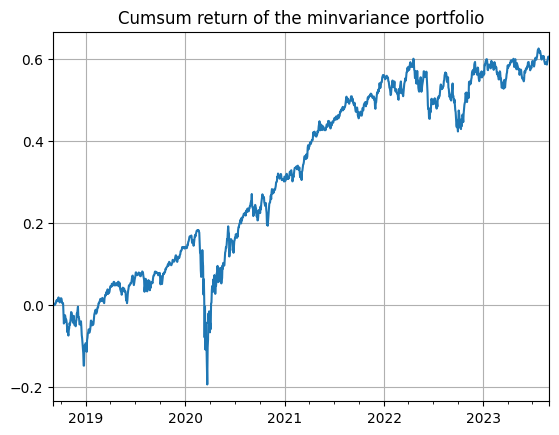

In [747]:
weighted_returns = df_ef_returns * df_min_variance['Weight']
weighted_returns['weighted_returns'] = weighted_returns.sum(axis = 1)
weighted_returns['weighted_returns'].cumsum().plot()
plt.title('Cumsum return of the minvariance portfolio')
plt.grid(True)

A refaire en monthly et pas en daily

In [748]:
df_ef_returns['Month'] = df_ef_returns.index.month
df_ef_returns['Year']= df_ef_returns.index.year
df_grouped = df_ef_returns.groupby(['Year', 'Month']).cumsum() #Retransforme en daily ?
df_ef_returns.drop(columns=['Year', 'Month'],axis=1,inplace=True)

In [763]:
def calculate_portfolio_return(weights, returns):
    return cp.matmul(returns, weights)

portfolio_weights = []

for i in range(len(df_grouped)):
    prev_weights = weights
    returns = df_grouped.iloc[i].values
    num_assets = len(df_grouped.iloc[i])
    
    weights = cp.Variable(num_assets)

    constraints = [cp.sum(weights) == 1,
                   weights >= 0,
                   weights <= 0.25,
                   prev_weights - weights <= 0.15]
    
    objective = cp.Maximize(calculate_portfolio_return(weights, returns))
    
    # Define the problem and solve
    prob = cp.Problem(objective, constraints)
    #print(prob)
    result = prob.solve()
    #print(prob.status)

    # Get the optimal weights
    optimal_weights = weights.value
    portfolio_weights.append(optimal_weights)



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [760]:
df_ef_returns.reset_index(drop=True,inplace=True)
df_ef_returns

,Growth,Low Risk,Low Size,Momentum,Value,Quality Income
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000189,-0.001392,-0.005400,0.001441,-0.005281,-0.000709
2,-0.007860,-0.002032,0.001910,-0.002640,0.003664,0.007797
3,-0.005300,0.002364,-0.007297,-0.005427,-0.008736,-0.004870
4,-0.001689,-0.003357,-0.005194,-0.005898,-0.003781,-0.001103
...,...,...,...,...,...,...
1300,0.005015,0.006035,0.005886,0.006481,0.007407,0.003419
1301,0.017590,0.008681,0.014284,0.015113,0.011296,0.003857
1302,0.007360,0.004057,0.005360,0.005514,0.000124,0.000125
1303,0.002207,-0.004305,0.001387,0.003577,-0.003052,-0.007193


In [764]:
df_portfolio_weights = pd.DataFrame(portfolio_weights)
df_portfolio_weights.columns = ['Growth','Low Risk','Low Size','Momentum','Value','Quality Income']

In [765]:
df_portfolio_weights

,Growth,Low Risk,Low Size,Momentum,Value,Quality Income
0,inf,inf,inf,inf,inf,inf
1,2.500000e-01,2.500000e-01,2.215773e-08,0.25,2.453696e-08,2.500000e-01
2,1.746044e-08,2.499935e-01,6.514985e-06,0.25,2.500000e-01,2.500000e-01
3,1.981352e-08,2.500000e-01,8.654958e-08,0.25,2.499999e-01,2.500000e-01
4,7.749024e-08,2.500000e-01,4.537683e-08,0.25,2.499999e-01,2.500000e-01
...,...,...,...,...,...,...
1300,1.945088e-09,2.500000e-01,1.336703e-09,0.25,2.500000e-01,2.500000e-01
1301,1.331938e-08,2.500000e-01,9.983503e-09,0.25,2.500000e-01,2.500000e-01
1302,4.416530e-08,2.500000e-01,6.705829e-09,0.25,2.500000e-01,2.500000e-01
1303,2.499999e-01,2.500000e-01,7.002655e-08,0.25,7.244195e-08,2.500000e-01


In [766]:
pnl = (df_portfolio_weights * df_ef_returns.reset_index()).sum(axis=1)

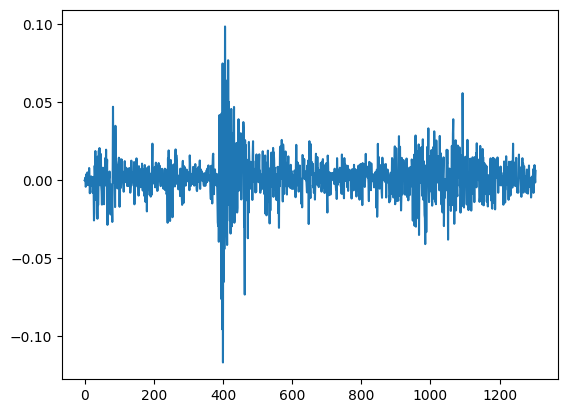

In [767]:
pnl = pnl[~np.isnan(pnl)]
plt.plot(pnl)

In [768]:
print(f'Meilleur jour : {100*max(pnl):.4f}%')
print(f'Pire jour : {100*min(pnl):.4f}%')
print(f'Jour moyen : {100*(pnl.mean()):.4f}%')
print(f'Nombre de jours: {len(pnl)}')

Meilleur jour : 9.8728%
Pire jour : -11.6954%
Jour moyen : 0.1299%
Nombre de jours: 1305


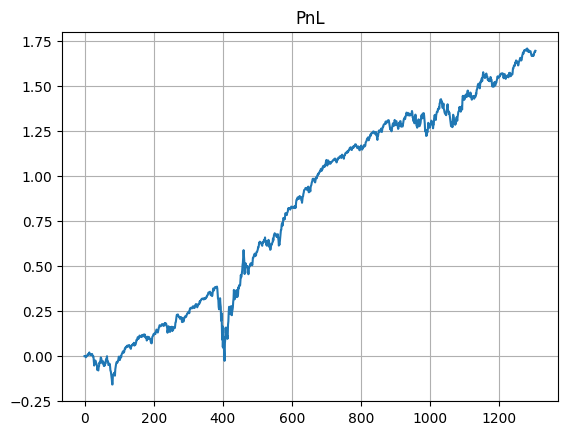

In [769]:
plt.plot(pnl.cumsum())
plt.title('PnL')
plt.grid(True)